In [56]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
#import oddball_analysis_functions as odbl
from jaratoolbox import celldatabase
from jaratoolbox import settings
from jaratoolbox import ephyscore
from jaratoolbox import spikesanalysis
from jaratoolbox import extraplots
from jaratoolbox import behavioranalysis

timeRangePlot = [-0.3, 0.45]
timeRangeStim = [0, 0.1]


subject = 'acid006'

inforecFile = os.path.join(settings.INFOREC_PATH, f'{subject}_inforec.py')

celldb = celldatabase.generate_cell_database(inforecFile)
dbPath = os.path.join(settings.DATABASE_PATH ,f'celldb_{subject}.h5')


# Add info for loading a specific cell.
cellDict = {'subject' : 'acid006',
            'date' : '2023-03-22',
            'pdepth' : 3000,
            'egroup' : 0,
            'cluster' : 44}

cellInd, dbRow = celldatabase.find_cell(celldb, **cellDict)
oneCell = ephyscore.Cell(dbRow)



Generating database for /Users/mdhor/Documents/GitHub/jarainfo/inforecordings\acid006_inforec.py
Adding experiment from acid006 on 2023-03-22


C:\Users/mdhor/Documents/GitHub/jaratoolbox\jaratoolbox\celldatabase.py:525: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  celldb = celldb.append(tempdb, ignore_index=True)


Raster Plot of spikes during TuningFreq

C:\Users/mdhor/Documents/GitHub/jaratoolbox\jaratoolbox\extraplots.py:132: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xpos = timeRange[0]+np.array([0, fillWidth, fillWidth, 0])


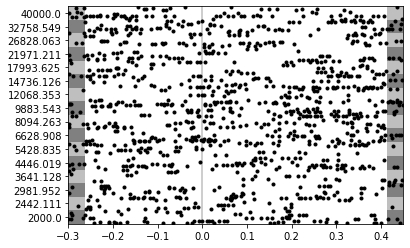

In [7]:
ephysData, bdata = oneCell.load('prePureTones')  
spikeTimes = ephysData['spikeTimes']
eventOnsetTimes = ephysData['events']['stimOn']


frequencies_each_trial = bdata['currentFreq']
array_of_frequencies = np.unique(bdata['currentFreq'])

# Checks to see if trial count from bdata is the same as trial count from ephys
if (len(frequencies_each_trial) > len(eventOnsetTimes)) or (len(frequencies_each_trial) < len(eventOnsetTimes)-1):
    print(f'Warning! BevahTrials ({len(frequencies_each_trial)}) and ' + f'EphysTrials ({len(eventOnsetTimes)})')
    sys.exit()

# If the ephys data is 1 more than the bdata, delete the last ephys trial.
if len(frequencies_each_trial) == len(eventOnsetTimes)-1:
    eventOnsetTimes = eventOnsetTimes[:len(frequencies_each_trial)]

(spikeTimesFromEventOnset, trialIndexForEachSpike, indexLimitsEachTrial) = spikesanalysis.eventlocked_spiketimes(spikeTimes, eventOnsetTimes, timeRangePlot)    

trialsEachCond = behavioranalysis.find_trials_each_type(frequencies_each_trial, array_of_frequencies)




fRaster = extraplots.raster_plot(spikeTimesFromEventOnset, indexLimitsEachTrial, timeRangePlot, trialsEachCond, labels = array_of_frequencies)

Tuning Curve


In [15]:
(spikeTimesStim, trialIndexForEachSpikeStimu, indexLimitsEachTrialStim) = spikesanalysis.eventlocked_spiketimes(spikeTimes, eventOnsetTimes, timeRangeStim)


spikeCountMat = spikesanalysis.spiketimes_to_spikecounts(spikeTimesFromEventOnset, indexLimitsEachTrial, timeRangeStim)

nTrials = len(indexLimitsEachTrial[0])

#get trial index for each condition
trialsEachCondInds, nTrialsEachCond, nCond= extraplots.trials_each_cond_inds(trialsEachCond, nTrials)

spike_counts_avg = []
for cond in range(trialsEachCond.shape[1]):
    spikes = spikeCountMat[trialsEachCond[:,cond]]
    spikes = np.mean(spikes)
    spikes = (spikes / timeRangeStim[1])
    spike_counts_avg.append(spikes)
   
spike_counts_avg

[5.0,
 6.999999999999999,
 4.5,
 1.0,
 5.0,
 2.8571428571428568,
 6.999999999999999,
 6.999999999999999,
 9.0,
 5.0,
 7.5,
 2.9999999999999996,
 4.5,
 5.0,
 5.5,
 5.0]

([<matplotlib.lines.Line2D at 0x269dd5367d0>],
 [<matplotlib.lines.Line2D at 0x269dd537730>])

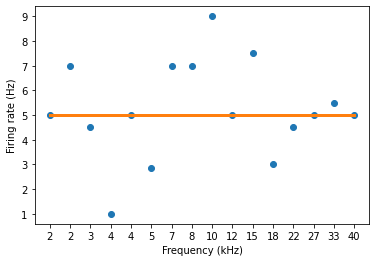

In [16]:
fitParams, RSquared = extraplots.fit_tuning_curve(array_of_frequencies, spike_counts_avg)
extraplots.plot_tuning_curve(array_of_frequencies, spike_counts_avg, fitParams)

Paired Comparison Plot for change in max firing rate during tuningFreq
(X: saline & doi columns, Y: firing rate)


In [17]:
# Load data for saline, lock spiketimes to event.
if oneCell.get_session_inds('salinePureTones') != []:
    ephysData, bdata = oneCell.load('salinePureTones')  
    spikeTimes = ephysData['spikeTimes']
    eventOnsetTimes = ephysData['events']['stimOn']


    frequencies_each_trial = bdata['currentFreq']
    array_of_frequencies = np.unique(bdata['currentFreq'])

    # Checks to see if trial count from bdata is the same as trial count from ephys
    if (len(frequencies_each_trial) > len(eventOnsetTimes)) or (len(frequencies_each_trial) < len(eventOnsetTimes)-1):
        print(f'Warning! BevahTrials ({len(frequencies_each_trial)}) and ' + f'EphysTrials ({len(eventOnsetTimes)})')
        sys.exit()

    # If the ephys data is 1 more than the bdata, delete the last ephys trial.
    if len(frequencies_each_trial) == len(eventOnsetTimes)-1:
        eventOnsetTimes = eventOnsetTimes[:len(frequencies_each_trial)]

    (spikeTimesFromEventOnset, trialIndexForEachSpike, indexLimitsEachTrial) = spikesanalysis.eventlocked_spiketimes(spikeTimes, eventOnsetTimes, timeRangeStim)    

    trialsEachCondSaline = behavioranalysis.find_trials_each_type(frequencies_each_trial, array_of_frequencies)

    spikeCountMatSaline = spikesanalysis.spiketimes_to_spikecounts(spikeTimesFromEventOnset, indexLimitsEachTrial, timeRangeStim)


# Load data for DOI, lock spiketimes to event.
if oneCell.get_session_inds('doiPureTones') != []:
    ephysData, bdata = oneCell.load('doiPureTones')  
    spikeTimes = ephysData['spikeTimes']
    eventOnsetTimes = ephysData['events']['stimOn']


    frequencies_each_trial = bdata['currentFreq']
    array_of_frequencies = np.unique(bdata['currentFreq'])

    # Checks to see if trial count from bdata is the same as trial count from ephys
    if (len(frequencies_each_trial) > len(eventOnsetTimes)) or (len(frequencies_each_trial) < len(eventOnsetTimes)-1):
        print(f'Warning! BevahTrials ({len(frequencies_each_trial)}) and ' + f'EphysTrials ({len(eventOnsetTimes)})')
        sys.exit()

    # If the ephys data is 1 more than the bdata, delete the last ephys trial.
    if len(frequencies_each_trial) == len(eventOnsetTimes)-1:
        eventOnsetTimes = eventOnsetTimes[:len(frequencies_each_trial)]

    (spikeTimesFromEventOnset, trialIndexForEachSpike, indexLimitsEachTrial) = spikesanalysis.eventlocked_spiketimes(spikeTimes, eventOnsetTimes, timeRangeStim)    

    trialsEachCondDOI = behavioranalysis.find_trials_each_type(frequencies_each_trial, array_of_frequencies)

    spikeCountMatDOI = spikesanalysis.spiketimes_to_spikecounts(spikeTimesFromEventOnset, indexLimitsEachTrial, timeRangeStim)



Calculates the average firing rate for DOI and saline

In [34]:

spike_counts_doi = []
for cond in range(trialsEachCondDOI.shape[1]):
    spikes = spikeCountMatDOI[trialsEachCondDOI[:,cond]]
    spikes = np.mean(spikes)
    spikes = (spikes / timeRangeStim[1])
    spike_counts_doi.append(spikes)

spike_counts_saline = []
for cond in range(trialsEachCondSaline.shape[1]):
    spikes = spikeCountMatSaline[trialsEachCondSaline[:,cond]]
    spikes = np.mean(spikes)
    spikes = (spikes / timeRangeStim[1])
    spike_counts_saline.append(spikes)   

In [33]:
'''
max_value_DOI = 0
max_value_each_cond = []
for cond in range(len(spike_counts_doi)):
    spikes = spike_counts_doi[cond]
    for spike in spikes:
        if spike >= max_value_DOI:
            max_value_DOI = spike
    max_value_each_cond.append(max_value_DOI)
'''


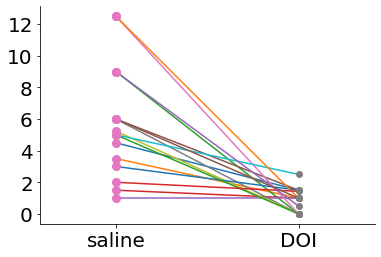

In [53]:

axes = plt.subplot()

barLoc = np.array([-0.24, 0.24])


for spikeAvg in range(len(spike_counts_saline)):
    plt.plot(barLoc, [spike_counts_saline[spikeAvg], spike_counts_doi[spikeAvg]], '-')

plt.plot(np.tile(barLoc[0], len(spike_counts_saline)), spike_counts_saline, 'o', ms=8)
plt.plot(np.tile(barLoc[1], len(spike_counts_doi)), spike_counts_doi, 'o')


axes.set_xlim(barLoc[0] - 0.2, barLoc[1] + 0.2)
axes.set_xticks(barLoc)
axes.set_xticklabels(['saline', 'DOI'])
#axes.set_ylim()

extraplots.boxoff(axes)
extraplots.set_ticks_fontsize(axes, 20)

# pVal = stats.wilcoxon(data[1], data[0])
# print(f"Change in pVal: {pVal}")

# if pVal[1] < 0.05:
#     extraplots.significance_stars(barLoc, 0.98 * yLim[1], 0.02 * np.diff(yLim), gapFactor=0.3)


# def plot_laser_comparison(axes, [spike_average_DOI, spike_average_saline], laserColour, laserFaceColour, yLim, xticklabels):
#     # Function for plot. Change accordingly
# def plot_laser_comparison(axes, data, laserColour, laserFaceColour, yLim, xticklabels):



Above shows the change in avg firing rate, not change in max firing rate.

Paired Comparison Plot for shift in firing rate peak location during tuningFreq
(X: saline & doi columns, Y: frequency



In [ ]:

spike_average_DOI
spike_average_saline

#Calculate peak area. (What if there is no peak?)


plot(X: saline & doi columns, Y: frequency


Oddball Plots

Raster plot of stimulus presentation showing highFreq as Oddball (X: time, y: frequency presented)

EG:   _ _ _ _ - _ _ 

Can use fake data?

In [ ]:


TrialsByCondition: {[false, false, false ,false ,true, false, false, false],[true, true, true, true, false, true, true ,true]}

x = time
#Can use fake data or use real times of stimulus presentation


Raster plot of stimulus presentation showing HighFreq as standard (X: time, y: frequency presented) 

eg: - - - - - _ - - - -

PSTH of oddball vs standard when pre (or saline)

In [ ]:
#Normal PSTH
extraplots.plot_psth(spikeCountMatHighPre/binWidth, smoothWinSizePsth, timeVec, combinedTrialsHighPre, colorsEachCond, linestyle=None, linewidth=lwPsth, downsamplefactor=downsampleFactorPsth)

PSTH of oddball vs standard when DOI

In [ ]:
#Normal PSTH
extraplots.plot_psth(spikeCountMatHighPre/binWidth, smoothWinSizePsth, timeVec, combinedTrialsHighPre, colorsEachCond, linestyle=None, linewidth=lwPsth, downsamplefactor=downsampleFactorPsth)

Plot showing the change in index ((odd-stand)/(odd+stand)) between saline and DOI (x: saline-doi columns, y: index between -1 and 1) for multiple sessions. 

In [ ]:
#Calculate index:

#only want spikes during timeRange [0.0, 0.1].

timeRange = [0, 0.1]

(spikeTimesFromEventOnset, trialIndexForEachSpike, indexLimitsEachTrial) = spikesanalysis.eventlocked_spiketimes(spikeTimes, eventOnsetTimes, timeRange)


spike_average_oddball
spike_average_standard

max_value_odd = 0
for avg in spike_average_oddball:
    if avg >= max_value_odd:
        max_value_odd = avg

# Do the same for standard and for DOI

standard_index = (max_value_odd - max_value_standard)/(max_value_odd + max_value_standard)



plot_laser_comparison(axes, [spike_average_DOI, spike_average_saline], laserColour, laserFaceColour, yLim, xticklabels)
